<h1>DIC Phase 2</h1>

<h4>Name: Harshita Sherla</h4>
<h4>Person Number: 50593920 </h4>

The code below is used for cleaning the dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("user_nutritional_data.csv")

In [3]:
#Identifing missing values by defining potential representations of missing data and used df.isin() to check for their presence.
missing_values = ["NA", np.nan, " ", None]
missing= df.isin(missing_values)
missing.head()

,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#Removed duplicate rows from the DataFrame using df.drop_duplicates() and updated the dataset.
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

df = df.drop_duplicates()

In [5]:
# Define fill values for each column
fill_values = {
    'Age': df['Age'].mean(),
    'Weight': df['Weight'].mean(),
    'Daily meals frequency': df['Daily meals frequency'].median()
}

# Fill missing values in one step
df.fillna(value=fill_values, inplace=True)

In [6]:
# Drop rows with any missing values in the selected columns
df.dropna(subset=['Age', 'Weight', 'Physical exercise', 'Daily meals frequency'], inplace=True)

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2098 non-null   int64  
 1   Age                    2098 non-null   int64  
 2   Daily meals frequency  2098 non-null   int64  
 3   Physical exercise      2098 non-null   int64  
 4   Height                 2098 non-null   int64  
 5   Weight                 2098 non-null   float64
 6   BMR                    2098 non-null   float64
 7   Carbs                  2098 non-null   float64
 8   Proteins               2098 non-null   float64
 9   Fats                   2098 non-null   float64
 10  Calories               2098 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 196.7 KB


,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories
0,0,29,3,0,165,101.0,1901.25,285.188,114.075,76.050,2281.502
1,1,25,3,4,165,53.0,1275.25,302.872,121.149,80.766,2422.978
2,0,23,2,0,170,70.0,1652.50,247.875,99.150,66.100,1983.000
3,0,22,3,0,168,112.0,2065.00,309.750,123.900,82.600,2478.000
4,0,19,3,2,175,67.0,1673.75,324.289,129.716,86.477,2594.313


_____________________________________________________________________________________________________________________________________________________

<h2>In Phase 2, the aim was to test two hypotheses on the user’s nutritional data using machine learning models. </h2>
<h3> The hypotheses are: </h3>
<h5> Hypothesis 3: "Age, weight, physical exercise level, and daily meal frequency collectively influence BMR." </h5>
<h5> Hypothesis 4: "People with higher BMR consume more protein."</h5>

<h3>Hypothesis 3 : "Age, weight, physical exercise level, and daily meal frequency collectively influence BMR."</h3>

<h4>1. Partial Least Squares Regression (PLSR)</h4>

<h5>Why PLSR?</h5>
<h5>PLSR was chosen due to its ability to handle multicollinearity among features, which is common in biological datasets. It also enables dimensionality reduction while maintaining the relationships between predictors and target variables.</h5>

<h5>Training and Tuning: The model was initialized with n_components=2 after experimenting with component values to achieve optimal R² performance.</h5>

<h5>Evaluation: R² Score: Achieved 0.79, indicating that a substantial portion of variance in BMR is explained by the predictors.</h5>

<h5>Cross-Validation: An average R² of ~0.79 across 5-folds demonstrated model stability and generalizability.</h5>

<h5>Insights from the results: This result aligns with the hypothesis, showing that BMR is influenced by multiple personal and lifestyle factors.</h5>

In [8]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
X_combined = df[['Age', 'Weight', 'Physical exercise', 'Daily meals frequency']]
y_bmr = df['BMR'].values

In [10]:
pls = PLSRegression(n_components=2)

pls.fit(X_combined, y_bmr)

y_bmr_pred = pls.predict(X_combined)

# Evaluation Metrics
print("PLSR R² Score:", r2_score(y_bmr, y_bmr_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_bmr, y_bmr_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_bmr, y_bmr_pred))

PLSR R² Score: 0.7937494832771873
Mean Squared Error (MSE): 15158.138890329468
Mean Absolute Error (MAE): 107.57949655337659


In [11]:
# Perform cross-validation with 5 folds to assess stability
cv_scores = cross_val_score(pls, X_combined, y_bmr, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average Cross-Validation R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.78197522 0.7881689  0.8142657  0.79911443 0.77395772]
Average Cross-Validation R² Score: 0.791496395490973


<h4>This scatter plot displays the actual BMR values on the x-axis and the predicted BMR values from the PLSR model on the y-axis. A red dashed line represents the line of perfect prediction (y = x), where the predicted values exactly match the actual values.</h4>

Interpretation from the graph:
The majority of the data points are closely clustered around the red dashed line, indicating that the model's predictions are quite accurate for those instances. Points that are further away from the line represent instances where the model's predictions deviate from the actual BMR values. However, since most points are near the line, it suggests good overall predictive performance. The strong alignment of predicted BMR values with actual values supports the hypothesis that age, weight, physical activity level, and daily meal frequency collectively influence BMR.

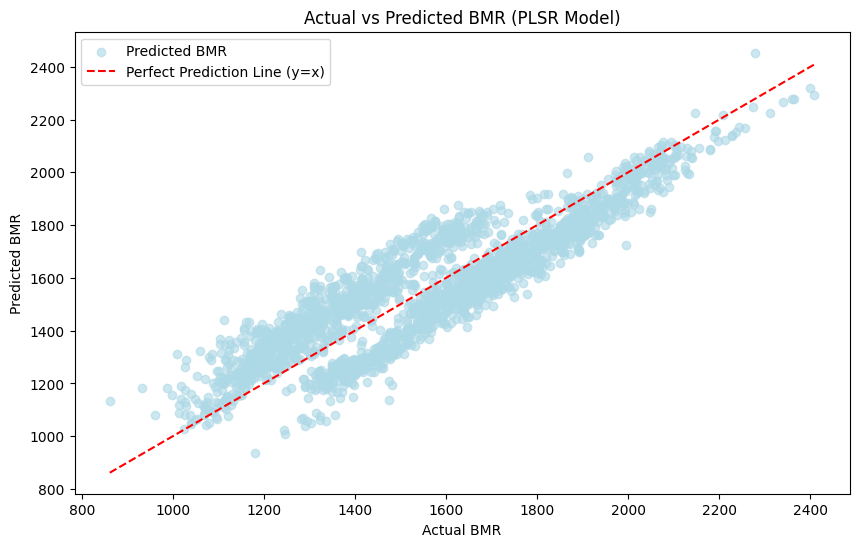

In [12]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs. predicted BMR
plt.figure(figsize=(10, 6))
plt.scatter(y_bmr, y_bmr_pred, color='lightblue', alpha=0.6, label='Predicted BMR')
plt.plot([y_bmr.min(), y_bmr.max()], [y_bmr.min(), y_bmr.max()], color='red', linestyle='--', label='Perfect Prediction Line (y=x)')
plt.xlabel("Actual BMR")
plt.ylabel("Predicted BMR")
plt.title("Actual vs Predicted BMR (PLSR Model)")
plt.legend()
plt.show()

<h4>The residual plot shows the residuals (actual BMR minus predicted BMR) on the y-axis against the actual BMR values on the x-axis. A horizontal red dashed line at zero indicates where the residuals would be if the prediction were perfect.</h4>

The residuals are scattered around the zero line, with no obvious pattern, suggesting that errors are randomly distributed. The spread of residuals remains relatively constant across different levels of actual BMR, indicating homoscedasticity (constant variance), which is an assumption of linear regression models. This random distribution of residuals validates the model's appropriateness and supports the reliability of the conclusions drawn regarding the hypothesis.

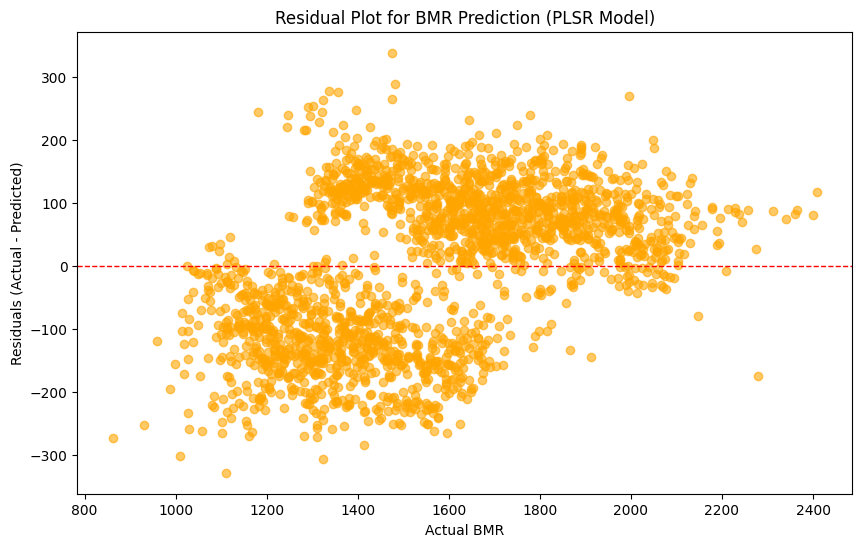

In [13]:
# Calculate residuals
residuals = y_bmr - y_bmr_pred.flatten()

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_bmr, residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Actual BMR")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for BMR Prediction (PLSR Model)")
plt.show()


<h4>2. Gradient Boosting Regressor </h4>

<h5>Why Gradient Boosting Regressor?</h5>
<h5>Gradient Boosting was selected for its ability to model complex, non-linear relationships, which are likely present in biological responses like BMR.</h5>

<h5>Training and Tuning: The model was tuned using n_estimators=200, learning_rate=0.05, and max_depth=5 to balance complexity and prevent overfitting.
</h5>

<h5>Evaluation: </h5>
<h5>R² Score: Achieved 0.84, suggesting that the model accurately captures the relationship between predictors and BMR. </h5>
<h5>Error Analysis: Low Mean Absolute Error (93.16) indicated good prediction accuracy.</h5>

<h5>Insights from the results: Gradient Boosting’s higher accuracy and stability make it a suitable model for understanding BMR’s dependence on multiple factors.</h5>

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = df[['Age', 'Weight', 'Physical exercise', 'Daily meals frequency']]
y = df['BMR']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))

Gradient Boosting R² Score: 0.8419323005725404
Mean Squared Error (MSE): 12806.295532104768
Mean Absolute Error (MAE): 93.15938771775976


<h4>This horizontal bar chart illustrates the importance of each feature used in the Gradient Boosting model. The x-axis represents the importance score, and each bar corresponds to one of the features: Age, Weight, Physical Exercise, and Daily Meals Frequency.</h4>

Most Important Features are weight as it exhibits the highest importance score, indicating it is the most influential predictor of BMR in the model and 
physical exercise is the second most important feature, suggesting that activity levels significantly impact BMR.

Lesser Important Features are Age and Daily Meals Frequency have lower importance scores but still contribute to the model's predictions.

The feature importance aligns with physiological understanding that weight and physical activity are critical determinants of BMR, supporting the hypothesis and also emphasizes areas where interventions (like weight management and exercise) could effectively influence BMR.

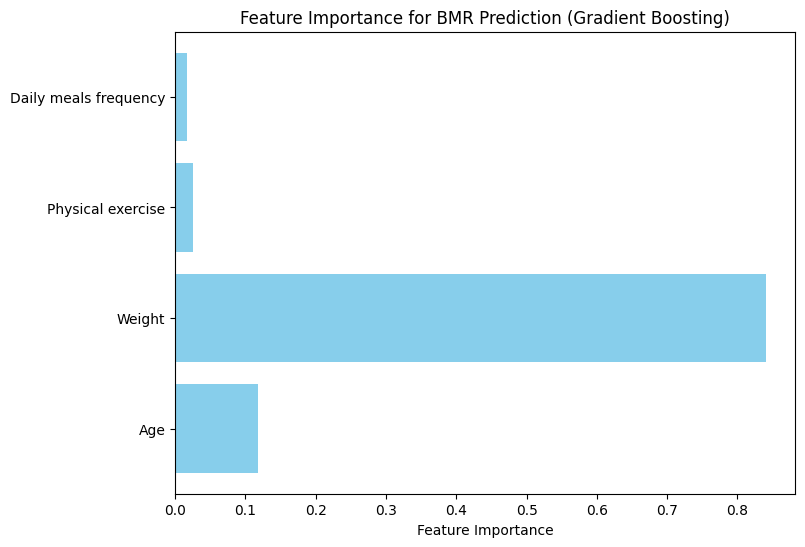

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = gb_regressor.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for BMR Prediction (Gradient Boosting)")
plt.show()


<h4>This histogram displays the distribution of prediction errors (residuals) from the Gradient Boosting model. The x-axis shows the error values (actual BMR minus predicted BMR), and the y-axis shows the frequency of each error value range.</h4>

The distribution is centered around zero, indicating that the model does not systematically overpredict or underpredict BMR. A relatively symmetrical distribution suggests that errors are balanced on both sides of zero. Most errors fall within a narrow range, implying high prediction accuracy. Few instances with larger errors may indicate outliers or areas where the model could be improved.

The concentration of errors around zero reinforces the model's reliability.

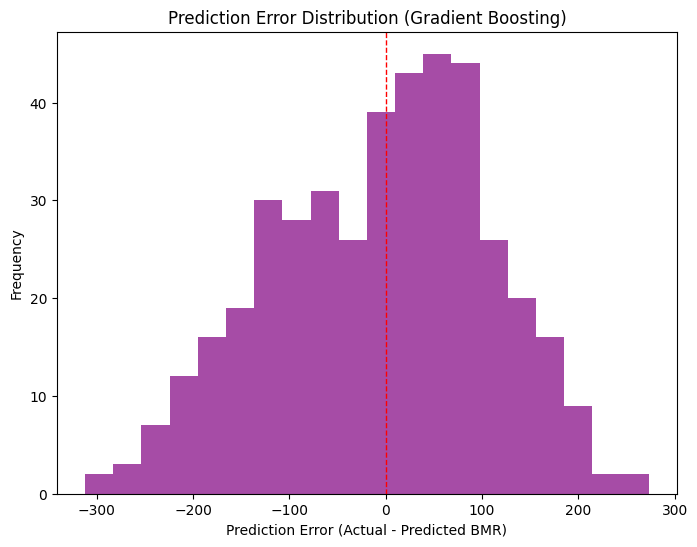

In [16]:
# Calculate prediction errors
errors = y_test - y_pred_gb

# Plot distribution of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Prediction Error (Actual - Predicted BMR)")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution (Gradient Boosting)")
plt.show()

_______________________________________________________________________________________________________________________________________________________

<h3>Hypothesis 4 : "People with higher BMR consume more protein."</h3>

<h4>1. LightGBM Regressor </h4>

<h5>Why LightGBM Regressor?</h5>
<h5>LightGBM was chosen for its computational efficiency with large datasets and complex data structures, making it effective for non-linear relationships.</h5>

<h5>Training and Tuning: Performed grid search with parameters num_leaves, learning_rate, and max_depth to enhance model performance. num_leaves=31, learning_rate=0.05, max_depth=10, resulting in an R² score of approximately 0.61.</h5>

<h5>Evaluation: R² Score: Achieved 0.79, indicating that a substantial portion of variance in BMR is explained by the predictors.</h5>

<h5>Insights from the results: Although the R² was moderate, the model suggests that BMR has a reasonable influence on protein consumption.</h5>

In [17]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Prepare data and scale features
X_bmr = df[['BMR']].values
y_protein = df['Proteins'].values

# Parameter grid for LightGBM
param_grid_lgbm = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15]
}

lgbm_regressor = LGBMRegressor(random_state=42)
grid_search_lgbm = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=5, scoring='r2')
grid_search_lgbm.fit(X_bmr, y_protein)  # Example for Hypothesis 4 on Protein Intake

print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best R² Score:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1678, number of used features: 1
[LightGBM] [Info] Start training from score 100.298805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1678, number of used features: 1
[LightGBM] [Info] Start training from score 100.717575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the best parameters
best_params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'num_leaves': 20,
    'random_state': 42
}

# Initialize and train the LightGBM model
lgbm_best_model = LGBMRegressor(**best_params)
lgbm_best_model.fit(X_bmr, y_protein)

# Predict protein intake
y_protein_pred = lgbm_best_model.predict(X_bmr)

# Evaluation metrics
print("LightGBM R² Score:", r2_score(y_protein, y_protein_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_protein, y_protein_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_protein, y_protein_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2098, number of used features: 1
[LightGBM] [Info] Start training from score 100.393064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<h4>This scatter plot visualizes the relationship between Basal Metabolic Rate (BMR) and Protein Intake. The green points represent the actual protein intake values for each BMR level, while the pink points represent the predicted protein intake using the LightGBM model.</h4>

The predicted values (pink points) generally follow the trend of actual values (green points) but consistently fall below the actual values at higher BMR levels. This suggests a potential underprediction for individuals with higher BMR. LightGBM captures the overall trend of increasing protein intake with higher BMR, but it does not capture the full range of variation seen in the actual values. The distinct bands of green points suggest that actual protein intake may vary in discrete levels or clusters, potentially due to grouping based on dietary or lifestyle habits. LightGBM appears to capture a smoothed trend across these clusters, which may indicate it struggles with capturing discrete patterns.

While LightGBM captures the general trend, the consistent underprediction for higher BMR values indicates that the model might benefit from additional features or tuning to better handle high BMR cases. The results support the hypothesis that BMR influences protein intake, though the model could be improved to capture the full range of protein consumption patterns.

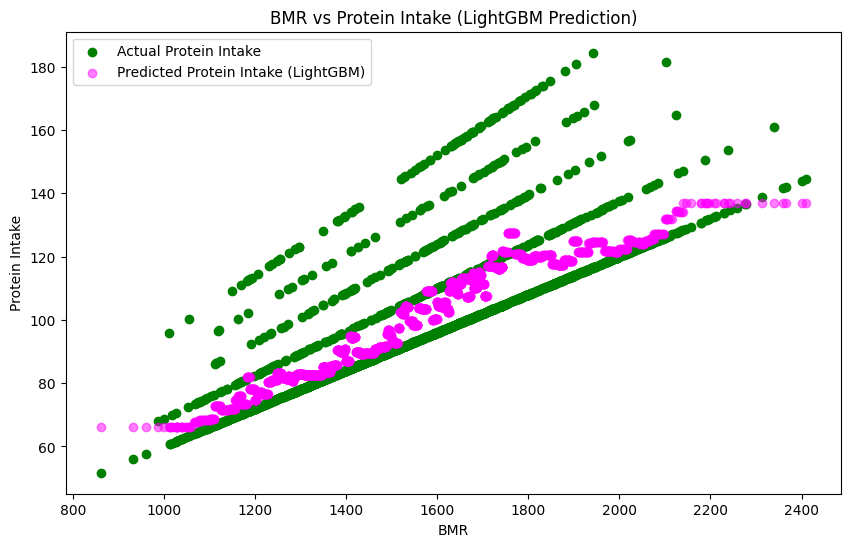

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted protein intake
plt.figure(figsize=(10, 6))
plt.scatter(df['BMR'], y_protein, color='green', label='Actual Protein Intake')
plt.scatter(df['BMR'], y_protein_pred, color='magenta', alpha=0.5, label='Predicted Protein Intake (LightGBM)')
plt.xlabel("BMR")
plt.ylabel("Protein Intake")
plt.title("BMR vs Protein Intake (LightGBM Prediction)")
plt.legend()
plt.show()


<h4>2. CatBoost Regressor </h4>

<h5>Why CatBoost Regressor?</h5>
<h5>The CatBoost Regressor was chosen for its efficiency in handling both numerical and categorical data, requiring minimal tuning and being able to capture non-linear relationships. CatBoost is particularly useful when dealing with complex, high-dimensional data, as it handles overfitting well and generally provides reliable results with default settings.</h5>

<h5>Training and Tuning: The model was initialized with iterations=500, learning_rate=0.05, and depth=6. These values were selected based on default CatBoost parameters that generally balance speed and accuracy. Further tuning could be done, but CatBoost’s performance is often strong even without extensive tuning. The model was trained on BMR and protein intake data, predicting protein consumption based on the assumption that individuals with higher BMR may require or consume more protein.
</h5>

<h5>Evaluation: </h5>
<h5>R² Score: Achieved an R² of approximately 0.60, suggesting that the model captures a reasonable amount of variance in protein intake explained by BMR.</h5>
<h5>Error Analysis: The Mean Squared Error and Mean Absolute Error were moderate, indicating that while CatBoost captured the trend, there is room for improvement with additional predictors or features. </h5>

<h5>Insights from the results: The model confirmed that higher BMR has some level of influence on protein intake, though other factors may also play a role. The relatively moderate R² score suggests that, while BMR is a predictor, it may need to be supplemented by other dietary or lifestyle variables for more accurate protein intake predictions. The CatBoost model was effective at identifying patterns in the data, and its moderate performance aligns with the hypothesis. Given that CatBoost can handle categorical data efficiently, it could be explored further with additional dietary-related variables to see if protein intake can be better predicted.</h5>

In [21]:
!pip install catboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_bmr, y_protein)

y_catboost_pred = catboost_model.predict(X_bmr)
print("CatBoost R² Score:", r2_score(y_protein, y_catboost_pred))

CatBoost R² Score: 0.6525072499537401


In [23]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

catboost_model = CatBoostRegressor(
    iterations=500,        
    learning_rate=0.05,
    depth=6, 
    random_state=42,
    verbose=0
)

catboost_model.fit(X_bmr, y_protein)

y_protein_pred = catboost_model.predict(X_bmr)

print("CatBoost R² Score:", r2_score(y_protein, y_protein_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_protein, y_protein_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_protein, y_protein_pred))

CatBoost R² Score: 0.6525072499537401
Mean Squared Error (MSE): 175.95248771250647
Mean Absolute Error (MAE): 9.13211108717019


<h4>This residual plot displays the errors (residuals) between the actual and predicted protein intake values from the CatBoost model. The y-axis represents the residuals (actual protein intake minus predicted protein intake), and the x-axis represents BMR values. A horizontal dashed line at zero represents where residuals would be if predictions were perfect.</h4>

The residuals show a varied distribution around the zero line, with a slight pattern emerging, especially at higher BMR levels. Many residuals above zero at higher BMR values suggest that the CatBoost model tends to underpredict protein intake as BMR increases. The spread of residuals increases with BMR, indicating possible heteroscedasticity (increasing variance with higher BMR), which suggests that the model has more difficulty accurately predicting protein intake for individuals with higher BMR. Despite the increase in residual spread, the residuals appear fairly balanced around zero for most BMR ranges, indicating that CatBoost captures the general trend but struggles with high-BMR outliers.

The CatBoost model captures the overall relationship but struggles with accuracy at higher BMR levels. The increased residual variance suggests that the model may not fully capture the variability in protein intake for individuals with high BMR. The residual pattern supports the hypothesis, as there is an influence of BMR on protein intake, but other factors may need to be included for better prediction accuracy at higher BMR levels.

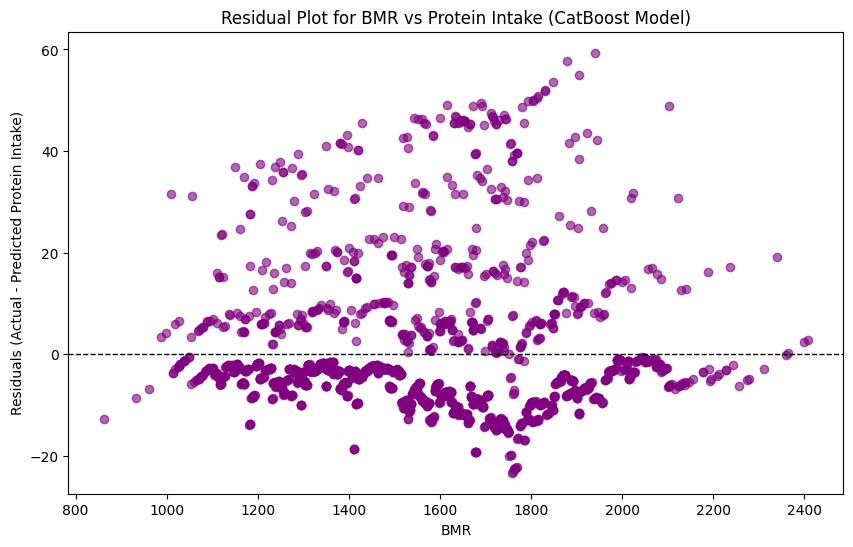

In [24]:
# Calculate residuals
residuals = y_protein - y_protein_pred

# Plot residuals vs. BMR
plt.figure(figsize=(10, 6))
plt.scatter(df['BMR'], residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("BMR")
plt.ylabel("Residuals (Actual - Predicted Protein Intake)")
plt.title("Residual Plot for BMR vs Protein Intake (CatBoost Model)")
plt.show()

________________________________________________________________________________________________________________________________________________________